In [214]:
import matplotlib.pyplot as plt

import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap

plt.style.use('dark_background')

In [301]:
availability = pd.read_csv('availability.csv')
availability = availability.dropna(subset=['calendar_months.days.available_for_checkin'])
availability['is_available'] = availability['calendar_months.days.available_for_checkin'].astype('bool')
availability['date'] = pd.to_datetime(availability['calendar_months.days.date'])
availability = availability.loc[availability['date'] > '2019-11-01']

availability

,input.listing_id,calendar_months.days.available,calendar_months.days.date,calendar_months.days.available_for_checkin,calendar_months.days.price.date,calendar_months.days.price.is_price_upon_request,calendar_months.days.price.local_adjusted_price,calendar_months.days.price.local_currency,calendar_months.days.price.local_price,calendar_months.days.price.native_adjusted_price,...,calendar_months.condition_ranges[0].start_date,calendar_months.condition_ranges[0].end_date,calendar_months.condition_ranges[0].conditions.closed_to_arrival,calendar_months.condition_ranges[0].conditions.closed_to_departure,calendar_months.condition_ranges[0].conditions.min_nights,calendar_months.condition_ranges[0].conditions.max_nights,calendar_months.condition_ranges[0].conditions.end_day_of_week,calendar_months.condition_ranges[0].conditions.start_day_of_week,is_available,date
34,3831,False,2019-11-02,False,2019-11-02,NaN,87,USD,87,87,...,2019-10-01,2019-10-01,False,False,1,730,2,NaN,False,2019-11-02
41,3831,False,2019-11-02,False,2019-11-02,NaN,87,USD,87,87,...,2019-11-01,2019-11-01,False,False,1,730,5,NaN,False,2019-11-02
42,3831,False,2019-11-03,False,2019-11-03,NaN,86,USD,86,86,...,2019-11-01,2019-11-01,False,False,1,730,5,NaN,False,2019-11-03
43,3831,False,2019-11-04,False,2019-11-04,NaN,85,USD,85,85,...,2019-11-01,2019-11-01,False,False,1,730,5,NaN,False,2019-11-04
44,3831,False,2019-11-05,False,2019-11-05,NaN,87,USD,87,87,...,2019-11-01,2019-11-01,False,False,1,730,5,NaN,False,2019-11-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437901,3200522,False,2020-09-29,False,2020-09-29,NaN,120,USD,120,120,...,2020-09-01,2020-09-01,False,False,5,1125,2,NaN,False,2020-09-29
437902,3200522,False,2020-09-30,False,2020-09-30,NaN,120,USD,120,120,...,2020-09-01,2020-09-01,False,False,5,1125,2,NaN,False,2020-09-30
437903,3200522,False,2020-10-01,False,2020-10-01,NaN,120,USD,120,120,...,2020-09-01,2020-09-01,False,False,5,1125,2,NaN,False,2020-10-01
437904,3200522,False,2020-10-02,False,2020-10-02,NaN,120,USD,120,120,...,2020-09-01,2020-09-01,False,False,5,1125,2,NaN,False,2020-10-02


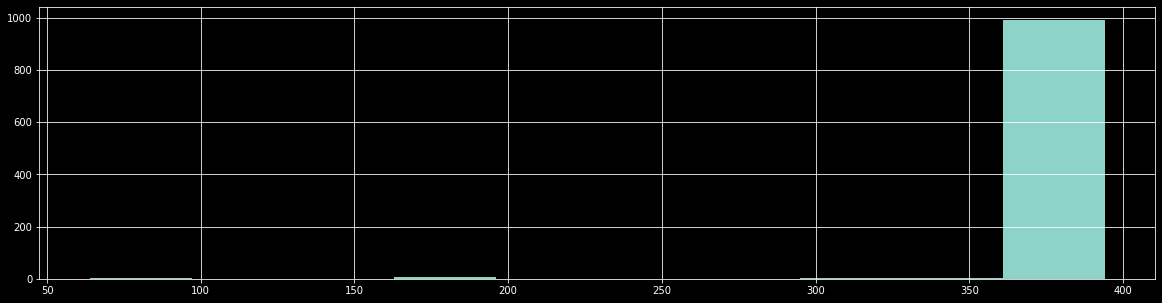

In [302]:
availability['input.listing_id'] \
    .value_counts() \
    .hist(figsize=(20,5))

In [312]:
availability['input.listing_id'].value_counts().idxmin()

734749

Text(0.5, 1.0, 'Availability Rate Distribution')

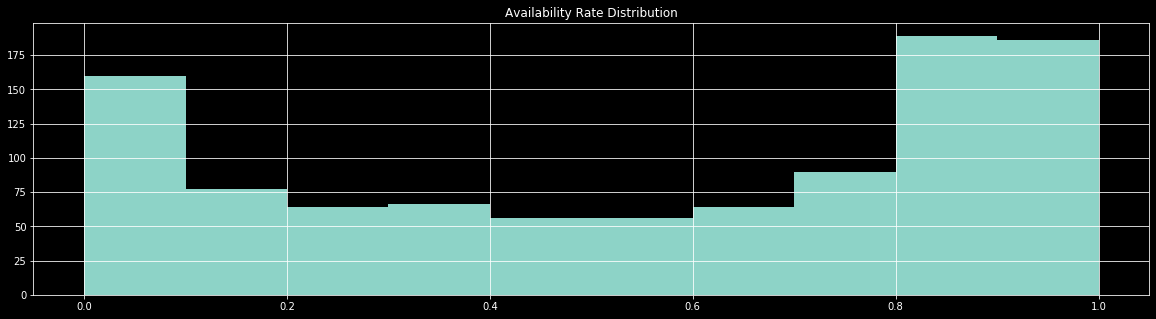

In [320]:
availability \
    .groupby('input.listing_id')['is_available'] \
    .mean() \
    .hist(figsize=(20,5))
plt.title('Availability Rate Distribution')

In [317]:
availability \
    .groupby('input.listing_id')['is_available'] \
    .mean() \
    .idxmin()

12048

(0, 1957.2)

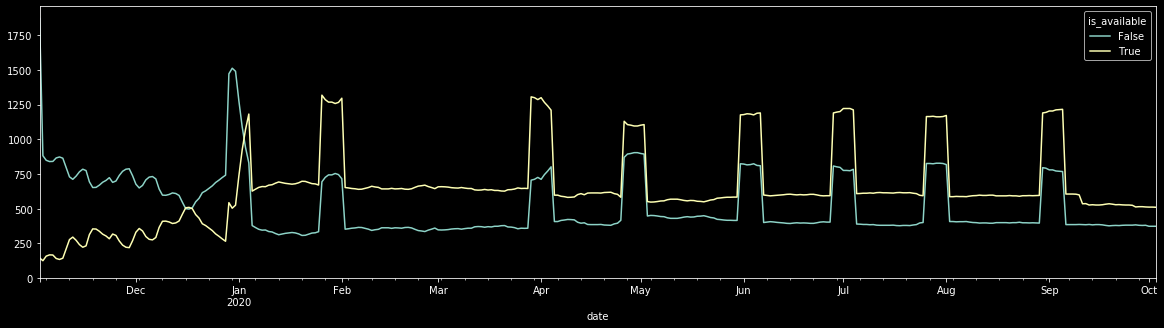

In [305]:
availability \
    .groupby('is_available')['date'] \
    .value_counts() \
    .unstack() \
    .transpose() \
    .plot(kind='line', figsize=(20,5))
plt.ylim(0)

(0, 0.958650182239894)

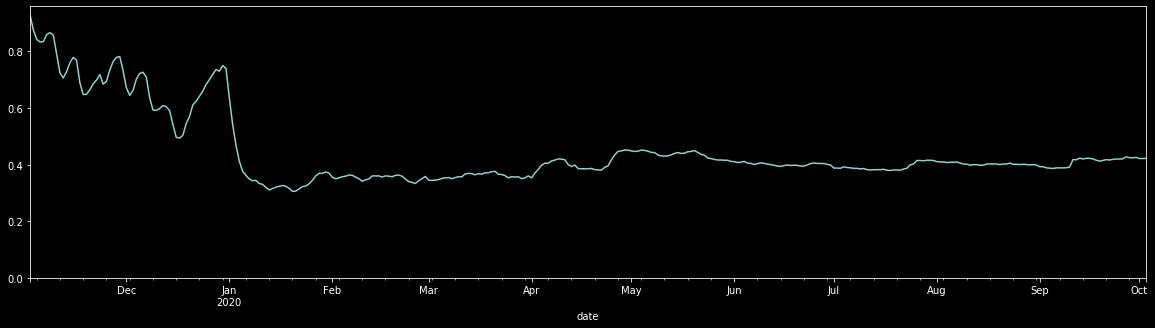

In [308]:
daily_occupancy_rate = 1 - availability.groupby('date')['is_available'].mean()
daily_occupancy_rate.plot(kind='line', figsize=(20,5))
plt.ylim(0)

(<Figure size 3000x1000 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x139add810>,
       dtype=object))

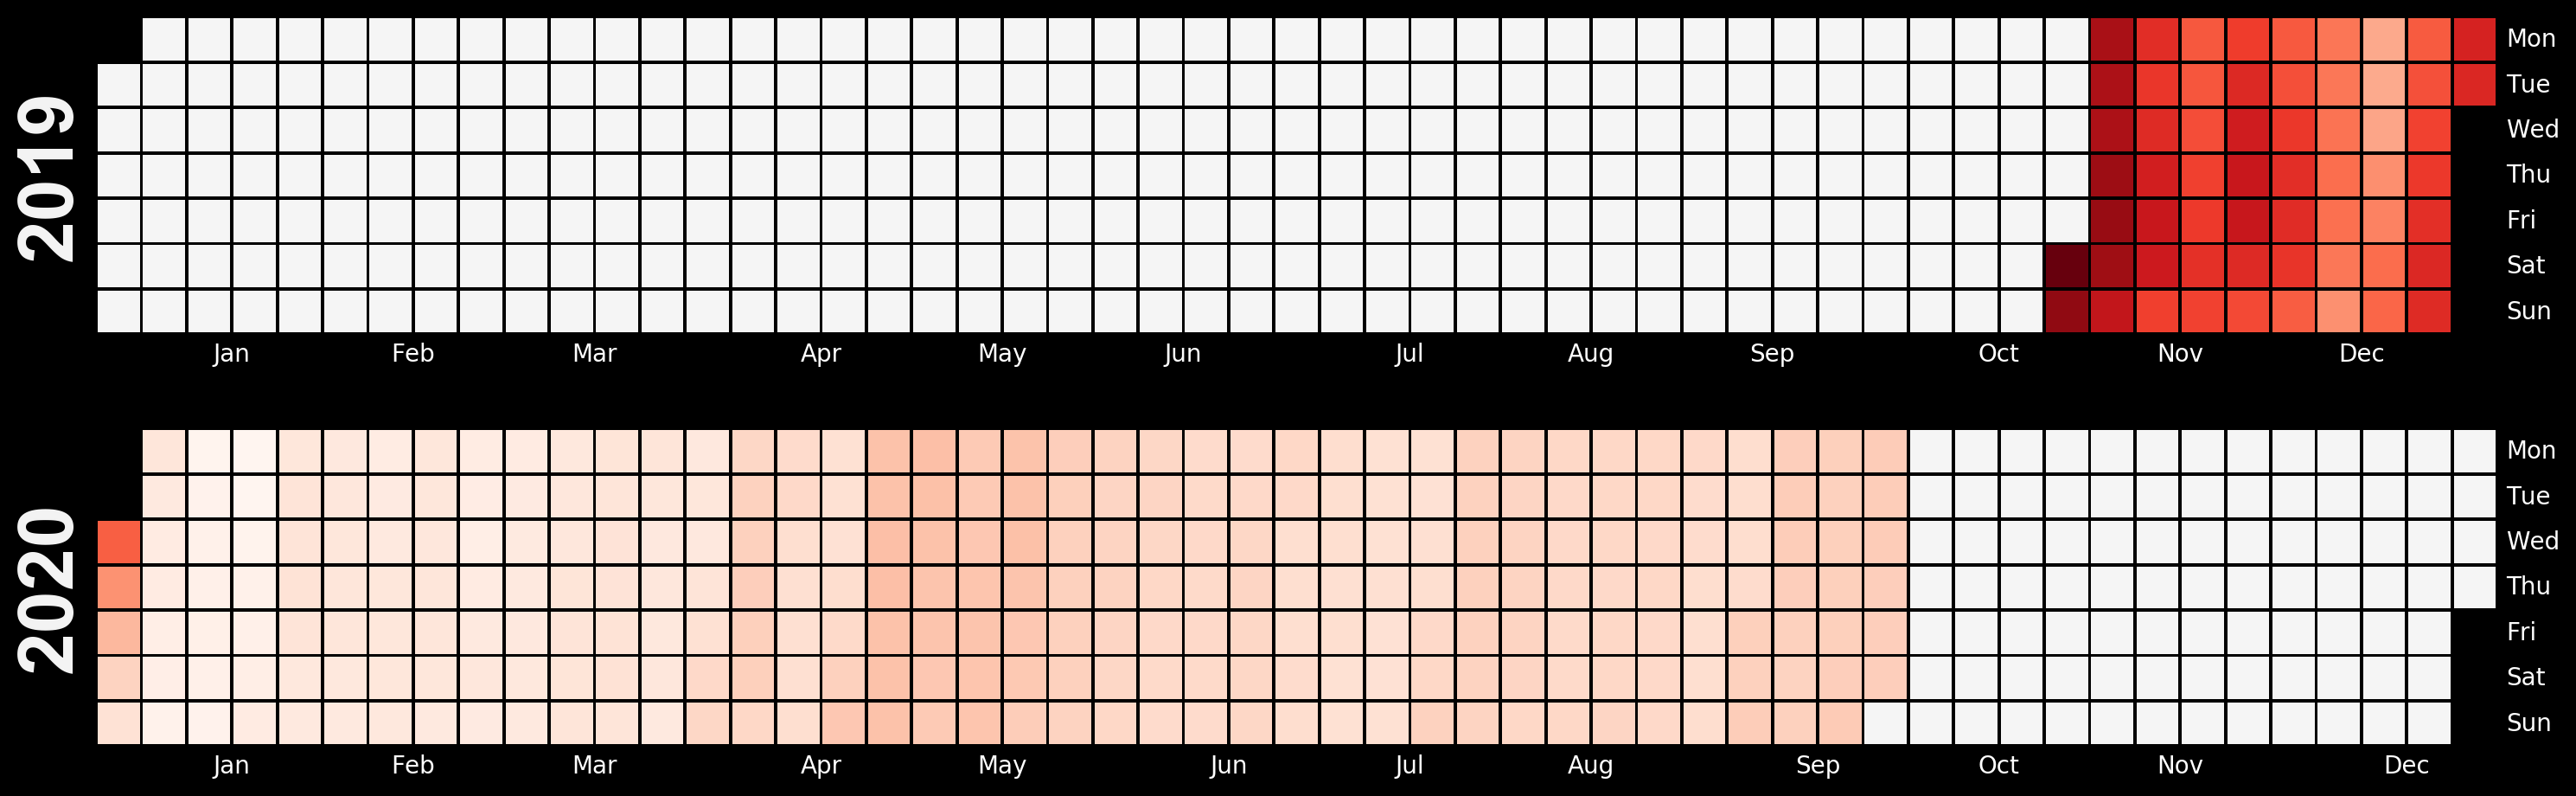

In [309]:
calmap.calendarplot(daily_occupancy_rate, fig_kws=dict(figsize=(15, 5), dpi=200))

(0, 173.27073308270678)

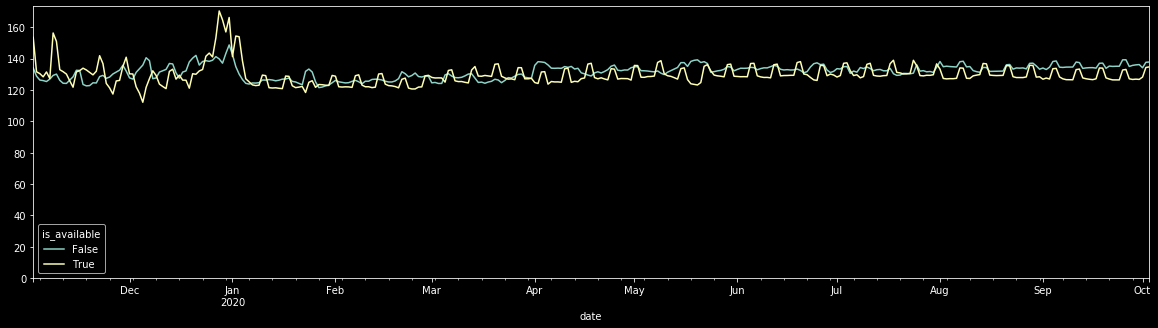

In [310]:
availability \
    .groupby(['is_available', 'date'])['calendar_months.days.price.local_adjusted_price'] \
    .mean() \
    .unstack() \
    .transpose() \
    .plot(kind='line', figsize=(20,5))
plt.ylim(0)